__Author: Samuel Estacio__

# __Lending Club Loan Default Predictor - Deep Learning__
## Deep Learning with Keras & TensorFlow Course-end Project

## __Objective__
Create a model that predicts whether or not a loan will be default using the historical data.
   
## __Problem Statement__
For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

## __Domain__
Finance

## __Analysis to be Done__
Perform data preprocessing and build a deep learning prediction model.
   
## __Dataset Columns & Definitions:__
●	__credit.policy:__ 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

●	__purpose:__ The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

●	__int.rate:__ The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

●	__installment:__ The monthly installments owed by the borrower if the loan is funded.

●	__log.annual.inc:__ The natural log of the self-reported annual income of the borrower.

●	__dti:__ The debt-to-income ratio of the borrower (amount of debt divided by annual income).

●	__fico:__ The FICO credit score of the borrower.

●	__days.with.cr.line:__ The number of days the borrower has had a credit line.

●	__revol.bal:__ The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

●	__revol.util:__ The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

●	__inq.last.6mths:__ The borrower's number of inquiries by creditors in the last 6 months.

●	__delinq.2yrs:__ The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

●	__pub.rec:__ The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## __Process Steps__
Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

## 1. Feature Transformation
#### Transform categorical values into numerical values (discrete)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from scipy.stats import zscore

from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold

from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [2]:
dfraw = pd.read_csv("loan_data.csv")
dfraw.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
dfraw.isnull().sum(axis=0)

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [4]:
dfraw.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [5]:
dfraw['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

<div class="note" style="background-color: #b7e1cd; padding: 10px;">
    <strong>Note:</strong> We'll need to encode the purpose column from categorical to numerical.
</div>

In [6]:
df = pd.concat([dfraw,pd.get_dummies(dfraw['purpose'],prefix="p",drop_first=True)],axis=1)
df.drop('purpose', axis=1, inplace=True)
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,p_credit_card,p_debt_consolidation,p_educational,p_home_improvement,p_major_purchase,p_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## 2. Exporatory Data Analysis of Different Factors of the Dataset

In [7]:
df.shape

(9578, 19)

In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,p_credit_card,p_debt_consolidation,p_educational,p_home_improvement,p_major_purchase,p_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Additional Feature Engineering
#### You will check the correlation between features and will drop those features which have a strong correlation to help reduce the number of features and leave you with the most relevant features


<div class="note" style="background-color: #b7e1cd; padding: 10px;">
    <strong>Note:</strong> We'll check correlations before and after standardizing, since some features have a wide range of numbers, we will standarize using z-scores so that they will be on even scales for the model.
</div>

In [9]:
df_xcorr = df.corr()
df_xcorr

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,p_credit_card,p_debt_consolidation,p_educational,p_home_improvement,p_major_purchase,p_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


In [10]:
df_xcorr = df.corr()
strong_df_xcorr = df_xcorr[(df_xcorr.abs() > 0.4) & (df_xcorr != 1)]
strong_df_xcorr

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,p_credit_card,p_debt_consolidation,p_educational,p_home_improvement,p_major_purchase,p_small_business
credit.policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.535511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int.rate,NaN,NaN,NaN,NaN,NaN,-0.714821,NaN,NaN,0.464837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,NaN,NaN,NaN,0.448102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
log.annual.inc,NaN,NaN,0.448102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fico,NaN,-0.714821,NaN,NaN,NaN,NaN,NaN,NaN,-0.541289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days.with.cr.line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revol.bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revol.util,NaN,0.464837,NaN,NaN,NaN,-0.541289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inq.last.6mths,-0.535511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="note" style="background-color: #b7e1cd; padding: 10px;">
    <strong>Note:</strong> We lowered our threshold for strong correlations to 0.4 to capture some stronger weak correlations & redundancies.
    <br><strong>Note:</strong> We see int.rate and fico have a strong negative correlation, which makes sense as high fico scores often get awarded lower interest rates. int.rate has a stronger correlation with not.fully.paid so we may eliminate fico for redunancy.
    <br><strong>Note:</strong> We see revol.util is also correlated with fico and int.rate, but since fico was eliminated and int.rate has a better correlation with not.fully.paid, we will eliminated revol.util here instead. Might be worth exploring combining these three into a metric.
    <br><strong>Note:</strong> We see credit.policy and inq.last.6months are negatively correlated, so we might be able to eliminate one on redundancy; between the two, credit.policy has a stronger correlation to not.fully.paid so we may eliminate inq.last.6months.
    <br><strong>Note:</strong> Lastly, log.annual.inc and installment have a positive correlation which makes sense as the higher incomes can afford to take on bigger loans. log.annual.inc had a stronger correllation to not.fully.paid, so we may eliminate installment.
</div>

In [11]:
dfz = df

In [12]:
dfz['int.rate']= zscore(dfz['int.rate'])
dfz['installment'] = zscore(dfz['installment'])
dfz['log.annual.inc'] = zscore(dfz['log.annual.inc'])
dfz['dti'] = zscore(dfz['dti'])
dfz['fico'] = zscore(dfz['fico'])
dfz['days.with.cr.line']= zscore(dfz['days.with.cr.line'])
dfz['revol.bal']= zscore(dfz['revol.bal'])
dfz['revol.util']= zscore(dfz['revol.util'])
dfz['inq.last.6mths']= zscore(dfz['inq.last.6mths'])
dfz['delinq.2yrs']= zscore(dfz['delinq.2yrs'])
dfz['pub.rec']= zscore(dfz['pub.rec'])

dfz.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,p_credit_card,p_debt_consolidation,p_educational,p_home_improvement,p_major_purchase,p_small_business
0,1,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,0,0,1,0,0,0,0
1,1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,0,1,0,0,0,0,0
2,1,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,0,0,1,0,0,0,0
3,1,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,0,0,1,0,0,0,0
4,1,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,0,1,0,0,0,0,0


In [13]:
dfz_xcorr = dfz.corr()
dfz_xcorr

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,p_credit_card,p_debt_consolidation,p_educational,p_home_improvement,p_major_purchase,p_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


In [14]:
dfz_xcorr = dfz.corr()
strong_dfz_xcorr = dfz_xcorr[(dfz_xcorr.abs() > 0.4) & (dfz_xcorr != 1)]
strong_dfz_xcorr

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,p_credit_card,p_debt_consolidation,p_educational,p_home_improvement,p_major_purchase,p_small_business
credit.policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.535511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int.rate,NaN,NaN,NaN,NaN,NaN,-0.714821,NaN,NaN,0.464837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,NaN,NaN,NaN,0.448102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
log.annual.inc,NaN,NaN,0.448102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fico,NaN,-0.714821,NaN,NaN,NaN,NaN,NaN,NaN,-0.541289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days.with.cr.line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revol.bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revol.util,NaN,0.464837,NaN,NaN,NaN,-0.541289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inq.last.6mths,-0.535511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dfz.corr()['not.fully.paid']

credit.policy          -0.158119
int.rate                0.159552
installment             0.049955
log.annual.inc         -0.033439
dti                     0.037362
fico                   -0.149666
days.with.cr.line      -0.029237
revol.bal               0.053699
revol.util              0.082088
inq.last.6mths          0.149452
delinq.2yrs             0.008881
pub.rec                 0.048634
not.fully.paid          1.000000
p_credit_card          -0.047136
p_debt_consolidation   -0.017543
p_educational           0.021609
p_home_improvement      0.007272
p_major_purchase       -0.028580
p_small_business        0.084460
Name: not.fully.paid, dtype: float64

In [16]:
df.corr()['not.fully.paid']

credit.policy          -0.158119
int.rate                0.159552
installment             0.049955
log.annual.inc         -0.033439
dti                     0.037362
fico                   -0.149666
days.with.cr.line      -0.029237
revol.bal               0.053699
revol.util              0.082088
inq.last.6mths          0.149452
delinq.2yrs             0.008881
pub.rec                 0.048634
not.fully.paid          1.000000
p_credit_card          -0.047136
p_debt_consolidation   -0.017543
p_educational           0.021609
p_home_improvement      0.007272
p_major_purchase       -0.028580
p_small_business        0.084460
Name: not.fully.paid, dtype: float64

<div class="note" style="background-color: #b7e1cd; padding: 10px;">
    <strong>Note:</strong> Using z-scores resulted in identical correlation results. So we'll eliminate redundant features fico, revol.util, inq.last.6mths and installment as well as anything with a absolute correlation coeff less than 0.02.
</div>

In [17]:
df_model = dfz

In [18]:
columns_to_drop = ['fico','revol.util','inq.last.6mths','installment','days.with.cr.line','delinq.2yrs','p_debt_consolidation','p_home_improvement']
df_model.drop(columns=columns_to_drop, inplace=True)
df_model.head()

,credit.policy,int.rate,log.annual.inc,dti,revol.bal,pub.rec,not.fully.paid,p_credit_card,p_educational,p_major_purchase,p_small_business
0,1,-0.139318,0.680388,0.998505,0.353732,-0.237003,0,0,0,0,0
1,1,-0.578868,0.244031,0.244540,0.495018,-0.237003,0,1,0,0,0
2,1,0.486484,-0.908659,-0.141885,-0.397073,-0.237003,0,0,0,0,0
3,1,-0.813544,0.680388,-0.654697,0.496321,-0.237003,0,0,0,0,0
4,1,0.743509,0.597961,0.343326,-0.360663,-0.237003,0,1,0,0,0


## 4. Modeling
#### After applying EDA and feature engineering, you are now ready to build the predictive models by creating a deep learning model using Keras with Tensorflow backend.


Define inputs and outputs; Show an input and associated output

In [19]:
inputs = df_model.drop(columns=["not.fully.paid"])
inputs = inputs.values
x = inputs
inputs

array([[ 1.        , -0.13931753,  0.68038804, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.57886837,  0.2440308 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.48648368, -0.90865897, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.57886837, -0.54569448, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.39166043, -0.18272998, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.61685894,  0.54059439, ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
outputs = df_model["not.fully.paid"]
dummies = pd.get_dummies(outputs)
dummies.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [21]:
products = dummies.columns
outputs = dummies.values
y = outputs
outputs

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [22]:
print("Inputs: ",inputs[20])
print("Outputs: ", outputs[20])

Inputs:  [ 1.         -1.58834533  0.47679811  0.50457842  0.38166952 -0.23700318
  0.          0.          0.          0.        ]
Outputs:  [1 0]


Split into train/validation/test

In [33]:
# First, split data into training (80%) and testing (20%) sets
train_df, test_df = train_test_split(df_model, test_size=0.2, random_state=42)
# We will use crossvalidation/kfolds later on to split training set into training and validation

print("Train set size:", len(train_df), " ",round(len(train_df)/len(outputs)*100,0),"%")
print("Test set size:", len(test_df), " ",round(len(test_df)/len(outputs)*100,0),"%")

Train set size: 7662   80.0 %
Test set size: 1916   20.0 %


In [34]:
x_train = train_df.drop(columns=["not.fully.paid"])
x_train = x_train.values
x_train

array([[ 1.        ,  0.86643442, -1.52554446, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        , -1.44679505,  0.47679811, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.29204282,  0.38764724, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.74350918,  0.14072011, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.22499269,  0.11383361, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.59078389,  0.7733617 , ...,  0.        ,
         0.        ,  0.        ]])

In [35]:
y_train = train_df["not.fully.paid"]
dummies = pd.get_dummies(y_train)
y_train = dummies.values
y_train

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [36]:
x_test = test_df.drop(columns=["not.fully.paid"])
x_test = x_test.values
x_test

array([[ 0.        ,  1.18678504, -0.54569448, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.16166757,  0.36457455, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.29949283, -0.94984083, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.09908294,  0.18013041, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.73904368, -1.79120841, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.70754556,  0.47679811, ...,  0.        ,
         0.        ,  1.        ]])

In [37]:
y_test = test_df["not.fully.paid"]
dummies = pd.get_dummies(y_test)
y_test = dummies.values
y_test

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

Build the model such that the accuracy is high (>90%) on train and validation set; Compile the model (use appropriate loss function, and also, display accuracy metric); Fit the model on the train set

In [38]:
model = Sequential()
model.add(Dense(70, input_dim=x.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu',activity_regularizer=regularizers.l1(1e-10)))
model.add(Dense(2,activation='softmax'))


In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
history1 = model.fit(x_train,y_train,validation_split=.2,verbose=2,epochs=30)

Epoch 1/30
192/192 - 1s - loss: 0.4053 - accuracy: 0.8414 - val_loss: 0.4264 - val_accuracy: 0.8402 - 1s/epoch - 5ms/step
Epoch 2/30
192/192 - 1s - loss: 0.4043 - accuracy: 0.8435 - val_loss: 0.4265 - val_accuracy: 0.8421 - 539ms/epoch - 3ms/step
Epoch 3/30
192/192 - 1s - loss: 0.4043 - accuracy: 0.8421 - val_loss: 0.4259 - val_accuracy: 0.8421 - 543ms/epoch - 3ms/step
Epoch 4/30
192/192 - 1s - loss: 0.4016 - accuracy: 0.8435 - val_loss: 0.4291 - val_accuracy: 0.8408 - 516ms/epoch - 3ms/step
Epoch 5/30
192/192 - 1s - loss: 0.4040 - accuracy: 0.8419 - val_loss: 0.4271 - val_accuracy: 0.8421 - 545ms/epoch - 3ms/step
Epoch 6/30
192/192 - 1s - loss: 0.4030 - accuracy: 0.8422 - val_loss: 0.4294 - val_accuracy: 0.8415 - 724ms/epoch - 4ms/step
Epoch 7/30
192/192 - 1s - loss: 0.4014 - accuracy: 0.8419 - val_loss: 0.4276 - val_accuracy: 0.8428 - 757ms/epoch - 4ms/step
Epoch 8/30
192/192 - 1s - loss: 0.4015 - accuracy: 0.8442 - val_loss: 0.4282 - val_accuracy: 0.8415 - 747ms/epoch - 4ms/step
Epo

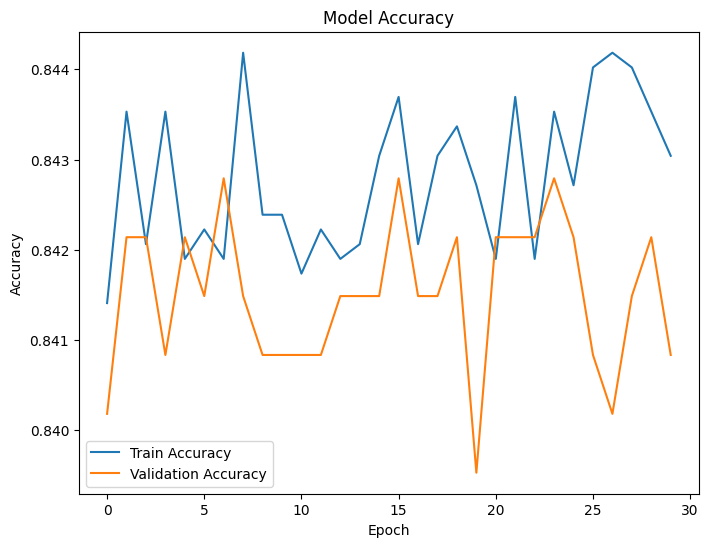

In [47]:
    plt.figure(figsize=(8, 6))
    plt.plot(history1.history['accuracy'], label='Train Accuracy')
    plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

<div class="note" style="background-color: #b7e1cd; padding: 10px;">
    <strong>Note:</strong> We had a chance to tune hyperparameters to 70 neurons on the input layer, .2 dropout, and 25 neurons on the 3rd layer. Model accuracy did not exceed 90%, but the learning looks pretty stable around 84% which is not too bad. The training and validation sets also look like they have converged around this level.
</div>

In [48]:
# Train the model
# cross_validate
kf =  KFold(10, shuffle =True, random_state =42)

oos_y = []
oos_pred = []
fold = 0

history_dict = {}


# Train the model
for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")

    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]

    #kernel_regularizer=regularizers.l2(0.01),

    model = Sequential()
    model.add(Dense(70,input_dim=x.shape[1],activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(25,activation='relu',activity_regularizer=regularizers.l1(1e-10)))
    model.add(Dense(y.shape[1],activation='softmax'))


    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

    history = model.fit(x_train,y_train,validation_split=.2,verbose=0,epochs=30)
    history_dict[f'history_{fold}'] = history

    pred = model.predict(x_test)
    oos_y.append(y_test)
    # raw probabilities to chosen class (highest probability)
    pred = np.argmax(pred,axis=1)
    oos_pred.append(pred)

    # Measure this fold's accuracy
    y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
    score = metrics.accuracy_score(y_compare, pred)
    print(f"Fold score (accuracy): {score}")


Fold #1
30/30 [==============================] - 0s 2ms/step
Fold score (accuracy): 0.8590814196242171
Fold #2
30/30 [==============================] - 0s 2ms/step
Fold score (accuracy): 0.8235908141962421
Fold #3
30/30 [==============================] - 0s 2ms/step
Fold score (accuracy): 0.8298538622129437
Fold #4
30/30 [==============================] - 0s 2ms/step
Fold score (accuracy): 0.848643006263048
Fold #5
30/30 [==============================] - 0s 1ms/step
Fold score (accuracy): 0.8308977035490606
Fold #6
30/30 [==============================] - 0s 2ms/step
Fold score (accuracy): 0.8455114822546973
Fold #7
30/30 [==============================] - 0s 2ms/step
Fold score (accuracy): 0.8413361169102297
Fold #8
30/30 [==============================] - 0s 2ms/step
Fold score (accuracy): 0.824634655532359
Fold #9
30/30 [==============================] - 0s 1ms/step
Fold score (accuracy): 0.8181818181818182
Fold #10
30/30 [==============================] - 0s 3ms/step
Fold score (a

Plot convergence curve for train set and validation set

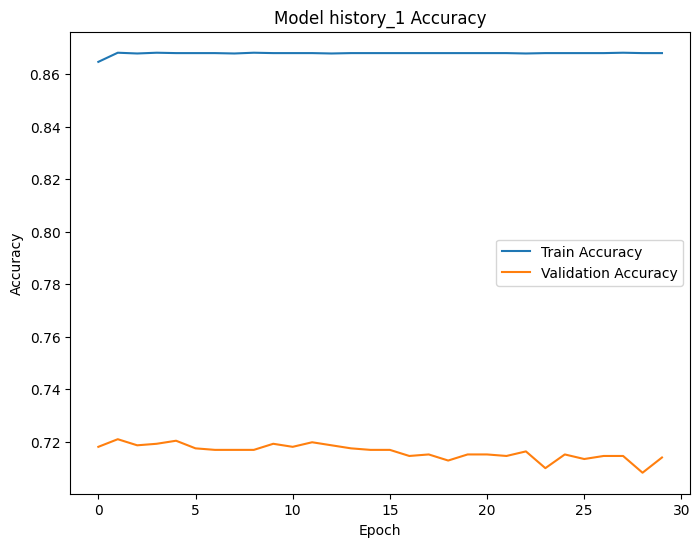

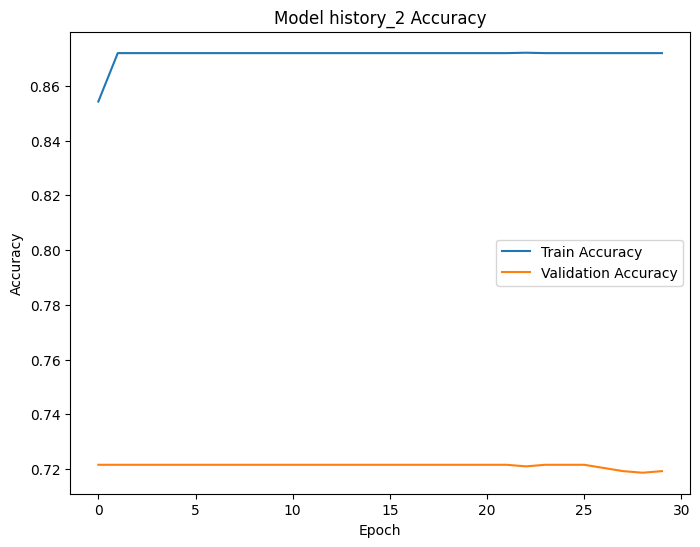

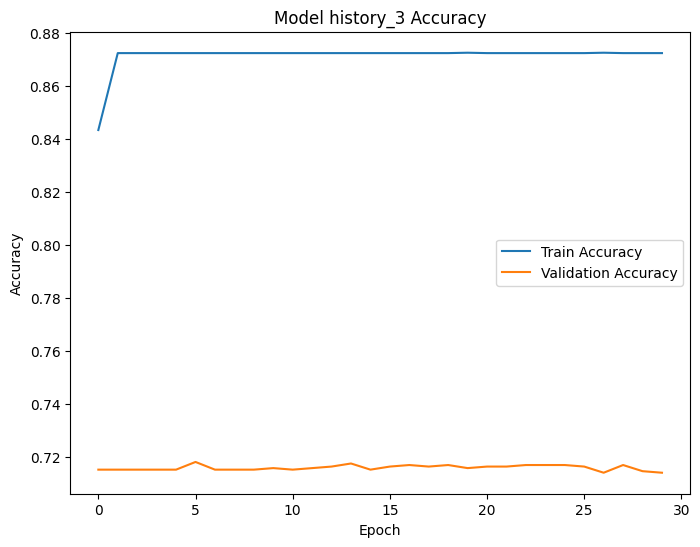

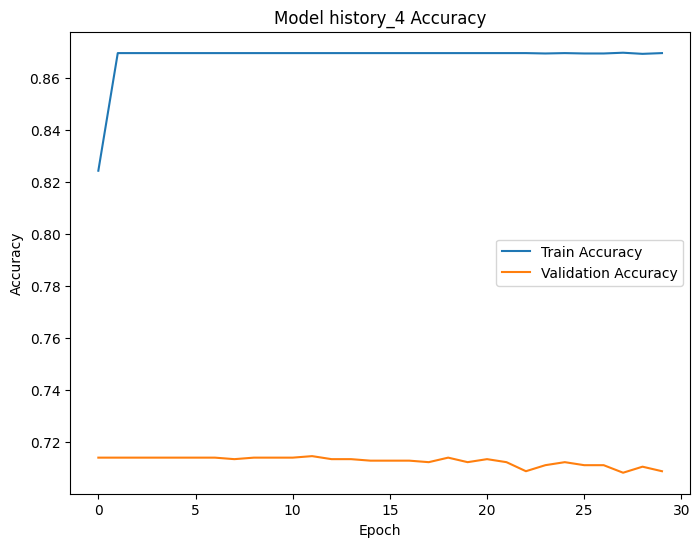

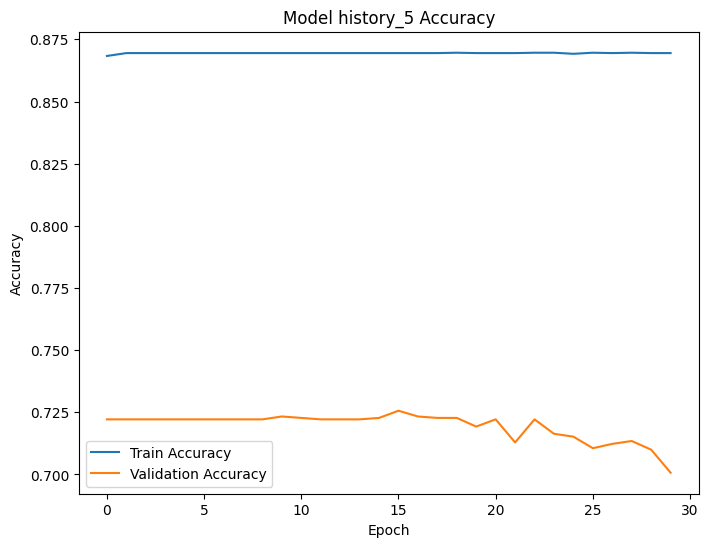

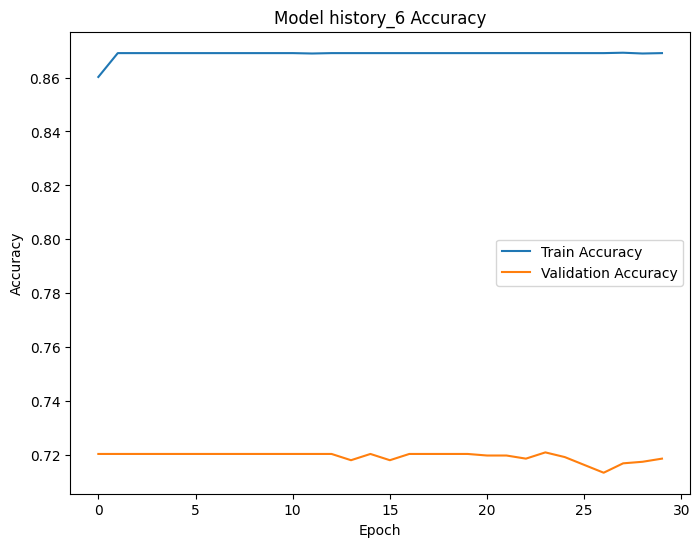

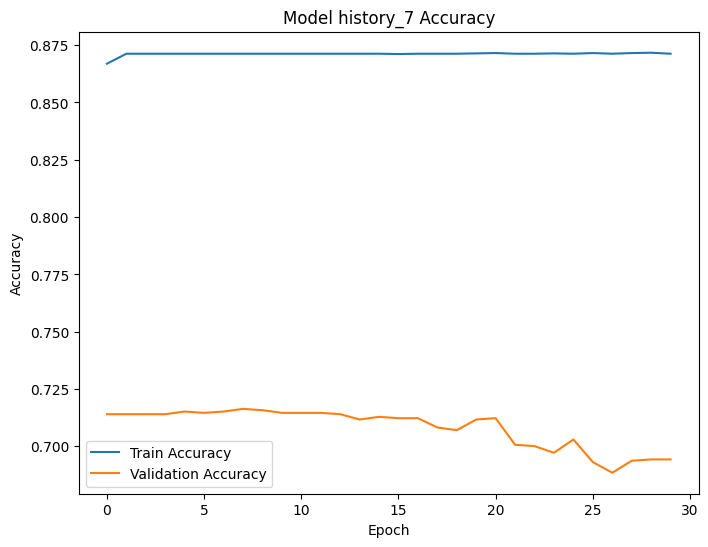

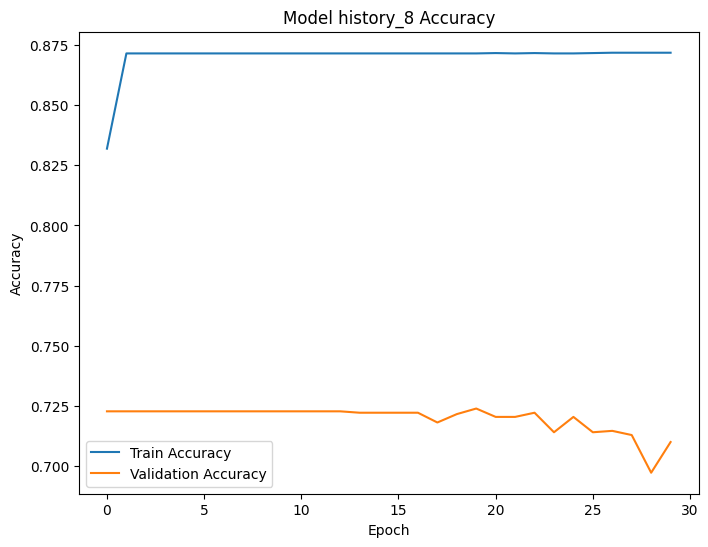

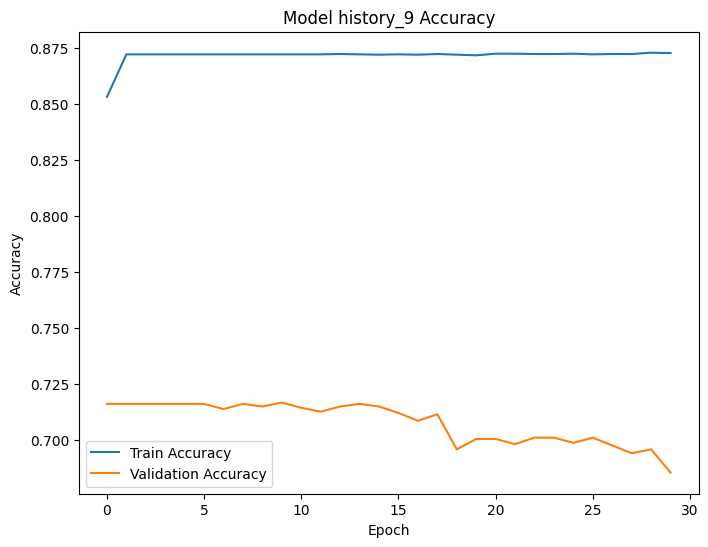

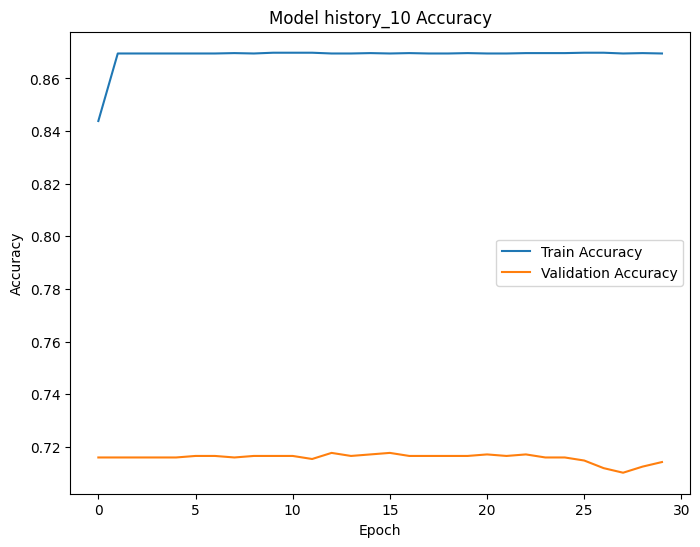

In [49]:
for key, history in history_dict.items():
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model {key} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

<div class="note" style="background-color: #b7e1cd; padding: 10px;">
    <strong>Note:</strong> Using crossvalidation on 10 folds improved the training set performance but reduced the validation set performance, which might indicate overfitting and would need further tweaking/investigation to address the model's performance with new data. The validation performance doesn't seem to be nosediving or drastically diverging from the training performance, so that's a good sign that the model is still performing well.
</div>

Show at least an example of prediction for at least one example from the test set

In [54]:
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1)

score = metrics.accuracy_score(oos_y_compare,oos_pred)
print(f"Final score (accuracy): {score}")

oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat([df,oos_y,oos_pred],axis=1)


Final score (accuracy): 0.8373355606598455


In [79]:
y_test[100]

array([1, 0], dtype=uint8)

In [78]:
pred[100]

0

<div class="note" style="background-color: #b7e1cd; padding: 10px;">
    <strong>Note:</strong> This test correctly predicted this person as not defaulting. Depending on what the ultimate goal was for the model, we could adjust the parameters to  optimize recall for example to identify more instances of defaulting at the expense of incorrectly identifying (increasing false positives).
</div>